In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


First of all, import all necessary modules and libraries.



In [4]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Then load the dataset and split it into train and test sets.



In [5]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


We will print training sample shape, test sample shape and total number of classes present in CIFAR-10. There are 10 classes as we saw earlier. For the sake of example, we will print two example image from training set and test set.

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

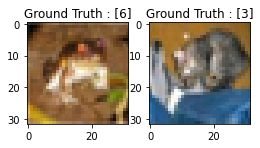

In [6]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

Find the shape of input image then reshape it into input format for training and testing sets. After that change all datatypes into floats.

In [7]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

Normalize the data between 0–1 by dividing train data and test data with 255 then convert all labels into one-hot vector with to_catagorical() function.



In [8]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Now create our model. We will add up Convo layers followed by pooling layers. Then we will connect Dense(FC) layer to predict the classes. Input data fed to first Convo layer, output of that Convo layer acts as input for next Convo layer and so on. Finally data is fed to FC layer which try to predict the correct labels.

In [9]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

Initialize all parameters and compile our model with rmsprops optimizer. There are many optimizers for example adam, SGD, GradientDescent, Adagrad, Adadelta and Adamax ,feel free to experiment with it. Here batch is 256 with 50 epochs.

In [10]:

model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary() is used to see all parameters and shapes in each layers in our models. You can observe that total parameters are 276, 138 and total trainable parameters are 276, 138. Non-trainable parameter is 0.

In [11]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [13]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 178 µs (started: 2022-06-01 16:47:57 +00:00)


After compiling our model, we will train our model by fit() method, then evaluate it.



In [14]:

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/50
196/196 [==============================] - 5s 27ms/step - loss: 0.9883 - accuracy: 0.6507 - val_loss: 1.0428 - val_accuracy: 0.6317
Epoch 2/50
196/196 [==============================] - 5s 27ms/step - loss: 0.9410 - accuracy: 0.6705 - val_loss: 0.8747 - val_accuracy: 0.6912
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 0.8942 - accuracy: 0.6853 - val_loss: 1.0919 - val_accuracy: 0.6266
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 0.8524 - accuracy: 0.7026 - val_loss: 0.8213 - val_accuracy: 0.7123
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 0.8251 - accuracy: 0.7115 - val_loss: 0.7908 - val_accuracy: 0.7291
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 0.7940 - accuracy: 0.7247 - val_loss: 0.8442 - val_accuracy: 0.7043
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 0.7652 - accuracy: 0.7332 - val_loss: 0.7519 - val_accuracy: 0.7463

[0.6910455822944641, 0.7990000247955322]

time: 4min 24s (started: 2022-06-01 16:48:01 +00:00)
